In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS

In [2]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 4.5 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=160323 sha256=bbe4bb599eecf1f9eccf97d325f83db55b24aabe53e7387989d624d805e28cdb
  Stored in directory: /Users/vaishnaviiparamashivam/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
You should consider upgrading via the '/Users/vaishnaviiparamashivam/opt/anaconda2/bin/python3 -m pip install --upgrade pip' command.


In [4]:
#import data
df = pd.read_csv("/Users/vaishnaviiparamashivam/Downloads/Reviews.csv")

In [5]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [156]:
#Basic Information shape and columns
print(df.columns)
print(df.shape)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
(568454, 10)


In [6]:
#compute the count and mean value as group by the products
count = df.groupby("ProductId", as_index=False).count()
mean = df.groupby("ProductId", as_index=False).mean()

#merge two dataset create df1
df1 = pd.merge(df, count, how='right', on=['ProductId'])

 

In [7]:
df1

,Id_x,ProductId,UserId_x,ProfileName_x,HelpfulnessNumerator_x,HelpfulnessDenominator_x,Score_x,Time_x,Summary_x,Text_x,Id_y,UserId_y,ProfileName_y,HelpfulnessNumerator_y,HelpfulnessDenominator_y,Score_y,Time_y,Summary_y,Text_y
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1,1,1,1,1,1,1,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,1,1,1,1,1,1,1,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1,1,1,1,1,1,1,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1,1,1,1,1,1,1,1,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,6,6,6,6,6,6,6,6,6
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,1,1,1,1,1,1,1,1,1
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2,2,2,2,2,2,2,2,2
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2,2,2,2,2,2,2,2,2


In [8]:
#rename column
df1["Count"] = df1["UserId_y"]
df1["Score"] = df1["Score_x"]
df1["Summary"] = df1["Summary_x"]

#Create New datafram with selected variables
df1 = df1[['ProductId','Summary','Score',"Count"]]

In [9]:
df1

,ProductId,Summary,Score,Count
0,B001E4KFG0,Good Quality Dog Food,5,1
1,B00813GRG4,Not as Advertised,1,1
2,B000LQOCH0,"""Delight"" says it all",4,1
3,B000UA0QIQ,Cough Medicine,2,1
4,B006K2ZZ7K,Great taffy,5,4
...,...,...,...,...
568449,B001EO7N10,Will not do without,5,6
568450,B003S1WTCU,disappointed,2,1
568451,B004I613EE,Perfect for our maltipoo,5,2
568452,B004I613EE,Favorite Training and reward treat,5,2


In [10]:
#choose only products have over 100 reviews
df1 = df1.sort_values(by='Count', ascending=False)
df2 = df1[df1.Count >= 100]

In [11]:
df2

,ProductId,Summary,Score,Count
563881,B007JFMH8M,yummy,5,913
563615,B007JFMH8M,Healthy and yummy too,5,913
563629,B007JFMH8M,Soft and chewy but a bit too sweet!,4,913
563628,B007JFMH8M,Pretty Good Cookie,4,913
563627,B007JFMH8M,Good Taste and Flavor But a Little on the Dry ...,3,913
...,...,...,...,...
528752,B000EVMNMI,Great Value!,4,100
11802,B004P4TL8E,"This is not necessarily a ""space saver""",4,100
528755,B000EVMNMI,Super Yummy Cola Taste!,5,100
11800,B004P4TL8E,Great tray for storing various K-cup varieties,4,100


In [12]:
#create new dataframe as combining all summary with same product Id
df4 = df.groupby("ProductId", as_index=False).mean()
combine_summary = df2.groupby("ProductId")["Summary"].apply(list)


In [13]:
combine_summary

ProductId
7310172001    [The Only Treat My Dog Will Eat!, Great for Di...
7310172101    [very good, Dogs Love These!, Great for travel...
B00004CI84    [Blueray:  Great movie.  Blue-Ray-Okay, Beetle...
B00004CXX9    [Great Movie...But NOT Given DELUXE Treatment,...
B00004RAMY    [It worked!, Finally, a trap that works, It wo...
                                    ...                        
B00954NY46    [Excellent Product, My weekend decadent pleasu...
B00954NYVY    [Actually Bold, I like it for my little wife, ...
B0098WV8F2    [FANTASTIC!!!!, Amazing Product!, delicious am...
B009E7YC54    [A wonderful product, I love PB2, LOVE, Amazin...
B009RB4GO4    [YUM!, Terrible! The cups were empty!, Autum w...
Name: Summary, Length: 866, dtype: object

In [14]:
combine_summary = pd.DataFrame(combine_summary)
combine_summary.to_csv("/Users/vaishnaviiparamashivam/Downloads/amazon_fine_foods/combine_summary.csv")

In [15]:
df4

,ProductId,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,0006641040,150511.0,3.027027,3.378378,4.351351,1.195771e+09
1,141278509X,515426.0,1.000000,1.000000,5.000000,1.332547e+09
2,2734888454,24750.5,0.500000,0.500000,3.500000,1.194005e+09
3,2841233731,308077.0,0.000000,0.000000,5.000000,1.345853e+09
4,7310172001,171190.0,0.809249,1.219653,4.751445,1.281072e+09
...,...,...,...,...,...,...
74253,B009UOFTUI,191721.0,0.000000,0.000000,1.000000,1.345853e+09
74254,B009UOFU20,1478.0,0.000000,0.000000,1.000000,1.345853e+09
74255,B009UUS05I,328482.0,0.000000,0.000000,5.000000,1.331856e+09
74256,B009WSNWC4,5703.0,0.000000,0.000000,5.000000,1.351210e+09


In [16]:
# create with certain columns
df3 = pd.read_csv("/Users/vaishnaviiparamashivam/Downloads/amazon_fine_foods/combine_summary.csv")
df3 = pd.merge(df3, df4, on="ProductId", how='inner')
df3 = df3[['ProductId','Summary','Score']]

In [17]:
df3

,ProductId,Summary,Score
0,7310172001,"['The Only Treat My Dog Will Eat!', 'Great for...",4.751445
1,7310172101,"['very good', 'Dogs Love These!', 'Great for t...",4.751445
2,B00004CI84,"['Blueray: Great movie. Blue-Ray-Okay', 'Bee...",4.486772
3,B00004CXX9,['Great Movie...But NOT Given DELUXE Treatment...,4.405128
4,B00004RAMY,"['It worked!', 'Finally, a trap that works', '...",4.104651
...,...,...,...
861,B00954NY46,"['Excellent Product', 'My weekend decadent ple...",4.561798
862,B00954NYVY,"['Actually Bold', 'I like it for my little wif...",4.561798
863,B0098WV8F2,"['FANTASTIC!!!!', 'Amazing Product!', 'delicio...",4.390698
864,B009E7YC54,"['A wonderful product', 'I love PB2', 'LOVE', ...",4.642857


# Text Clean process - Summary column

In [18]:
#function for tokenizing summary
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [19]:
#reset index and drop duplicate rows
df3["Summary_Clean"] = df3["Summary"].apply(cleanup)
df3 = df3.drop_duplicates(['Score'], keep='last')
df3 = df3.reset_index()

In [20]:
df3

,index,ProductId,Summary,Score,Summary_Clean
0,3,B00004CXX9,['Great Movie...But NOT Given DELUXE Treatment...,4.405128,great movie but not given deluxe treatment my ...
1,4,B00004RAMY,"['It worked!', 'Finally, a trap that works', '...",4.104651,it worked finally a trap that works it works b...
2,5,B00004RYGX,"['Great Movie', 'One of the best movies ever!'...",4.486772,great movie one of the best movies ever fabulo...
3,6,B000084E6V,"['The new favorite', 'Lasts', 'We all love fra...",4.107345,the new favorite lasts we all love frank dog l...
4,10,B0000V8IOE,"[""Incredible at any price; the best coffee I'v...",3.927419,incredible at any price the best coffee i ve t...
...,...,...,...,...,...
356,860,B0090X8IPM,"['A real taste pleasure', 'If you like Starbuc...",3.813208,a real taste pleasure if you like starbucks a ...
357,862,B00954NYVY,"['Actually Bold', 'I like it for my little wif...",4.561798,actually bold i like it for my little wife str...
358,863,B0098WV8F2,"['FANTASTIC!!!!', 'Amazing Product!', 'delicio...",4.390698,fantastic amazing product delicious amd yummy ...
359,864,B009E7YC54,"['A wonderful product', 'I love PB2', 'LOVE', ...",4.642857,a wonderful product i love pb love amazing pro...


In [21]:
from pandas import DataFrame 

docs = df3["Summary_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 

df5 = DataFrame(X.A, columns=vect.get_feature_names())
df5 = df5.astype(int)

In [22]:
df5

,alternative,amazing,awesome,baby,bad,bar,bars,best,better,big,...,value,vanilla,ve,water,way,wonderful,work,works,yum,yummy
0,0,0,6,0,1,0,0,9,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,0,0,0,0,11,0,0,...,0,0,2,0,4,0,8,31,0,0
2,0,0,6,0,1,0,0,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,2,0,0,10,0,4,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,2,0,0,10,0,0,...,1,0,2,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0,1,2,0,8,1,0,3,15,2,...,0,143,1,0,5,6,0,0,6,4
357,0,2,3,0,0,0,0,11,2,1,...,1,0,1,0,0,0,0,0,0,0
358,2,8,9,0,2,0,0,7,2,0,...,1,0,0,0,0,0,0,1,5,8
359,7,20,11,0,2,0,1,7,3,0,...,2,0,0,0,0,3,1,0,5,8


In [23]:
df5.columns

Index(['alternative', 'amazing', 'awesome', 'baby', 'bad', 'bar', 'bars',
       'best', 'better', 'big', 'blend', 'bold', 'bread', 'breakfast', 'buy',
       'cat', 'cats', 'cereal', 'chips', 'chocolate', 'coconut', 'coffee',
       'cookie', 'cookies', 'cup', 'cups', 'dark', 'deal', 'delicious', 'dog',
       'dogs', 'don', 'drink', 'easy', 'energy', 'excellent', 'fantastic',
       'favorite', 'flavor', 'food', 'formula', 'free', 'ginger', 'gluten',
       'good', 'great', 'green', 'happy', 'healthy', 'hot', 'just', 'like',
       'little', 'love', 'loved', 'loves', 'low', 'mix', 'natural', 'new',
       'nice', 'oil', 'ok', 'okay', 'organic', 'packaging', 'perfect',
       'pretty', 'price', 'product', 'protein', 'quality', 'real', 'really',
       'refreshing', 'smooth', 'snack', 'strong', 'stuff', 'sugar', 'sweet',
       'taste', 'tastes', 'tasting', 'tasty', 'tea', 'time', 'treat', 'treats',
       'use', 'value', 'vanilla', 've', 'water', 'way', 'wonderful', 'work',
       'wo

In [24]:
#save 
df5.to_csv("/Users/vaishnaviiparamashivam/Downloads/amazon_fine_foods/df5.csv")

In [25]:
# First let's create a dataset called X
X = np.array(df5)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]
#len of train and test
lentrain = len(df5_train)
lentest = len(df5_test)

In [29]:
X

array([[ 0,  0,  6, ...,  0,  0,  0],
       [ 0,  0,  3, ..., 31,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 2,  8,  9, ...,  1,  5,  8],
       [ 7, 20, 11, ...,  0,  5,  8],
       [ 2,  1,  2, ...,  0,  7,  6]])

In [27]:
df5_train

array([[ 0,  0,  6, ...,  0,  0,  0],
       [ 0,  0,  3, ..., 31,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  2,  0, ...,  8,  0,  0],
       [ 0,  1,  2, ...,  7,  0,  0],
       [ 5,  1,  4, ...,  2,  0,  0]])

In [28]:
df5_test

array([[ 5,  0,  6, ...,  1,  0,  0],
       [ 5,  2,  3, ...,  3,  0,  1],
       [ 0,  0,  1, ...,  0,  1,  2],
       ...,
       [ 2,  8,  9, ...,  1,  5,  8],
       [ 7, 20, 11, ...,  0,  5,  8],
       [ 2,  1,  2, ...,  0,  7,  6]])

# 1.b KNN classifier to find similar products

In [20]:
# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(df5_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df5_train)

In [21]:
#find most related products
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["ProductId"][lentrain + i] ," and this average Score is ",df3["Score"][lentrain + i])
    print ("The first similar product is ", df3["ProductId"][first_related_product] ," and this average Score is ",df3["Score"][first_related_product])
    print ("The second similar product is ", df3["ProductId"][second_related_product] ," and this average Score is ",df3["Score"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B007TGDXMU  and this average Score is  4.517006802721088
The first similar product is  B005ZBZLPI  and this average Score is  4.0
The second similar product is  B000SDKDM4  and this average Score is  4.08252427184466
-----------------------------------------------------------
Based on product reviews, for  B007TGDXNO  and this average Score is  4.3478260869565215
The first similar product is  B007TGDXMK  and this average Score is  4.143540669856459
The second similar product is  B00451WLYI  and this average Score is  4.517647058823529
-----------------------------------------------------------
Based on product reviews, for  B007TJGY5K  and this average Score is  4.119496855345912
The first similar product is  B007L3NVKU  and this average Score is  4.355072463768116
The second similar product is  B0027Z8VES  and this average Score is  4.341269841269841
-----------------------------------------------------------
Based on product reviews, for  B007TJGZ0Y  an

# 1.c Predicting Review Score

In [22]:
df5_train_target = df3["Score"][:lentrain]
df5_test_target = df3["Score"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df5_train, df5_train_target)
knnpreds_test = knnclf.predict(df5_test)
print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))
print (accuracy_score(df5_test_target, knnpreds_test))

[4 4 4 3 4 4 3 3 3 4 4 3 3 3 4 4 4 3 3 3 4 3 4 3 4 3 4 4 4 4 4 4 3 4 3 4 3]
              precision    recall  f1-score   support

           3       0.50      0.80      0.62        10
           4       0.90      0.70      0.79        27

    accuracy                           0.73        37
   macro avg       0.70      0.75      0.70        37
weighted avg       0.80      0.73      0.74        37

0.7297297297297297


# 2. User based collaborative filtering 

In [23]:
count = df.groupby("UserId", as_index=False).count()
mean = df.groupby("UserId", as_index=False).mean()

#merge two dataset create df1
df1 = pd.merge(df, count, how='right', on=["UserId"])
#rename column
df1["Count"] = df1["ProductId_y"]
df1["Score"] = df1["Score_x"]
df1["Summary"] = df1["Summary_x"]

#Create New datafram with selected variables
df1 = df1[["UserId",'Summary','Score',"Count"]]

In [24]:
df1 = df1.sort_values(by='Count', ascending=False)
df2 = df1[df1.Count >= 100]

In [26]:
df4 = df.groupby("UserId", as_index=False).mean()
combine_summary = df2.groupby("UserId")["Summary"].apply(list)
combine_summary = pd.DataFrame(combine_summary)
combine_summary.to_csv("/Users/sujaikarunakaran/Downloads/amazon-fine-food-reviews/combine_summary2.csv")

In [28]:
df3 = pd.read_csv("/Users/sujaikarunakaran/Downloads/amazon-fine-food-reviews/combine_summary2.csv")
df3 = pd.merge(df3, df4, on="UserId", how='inner')
df3 = df3[['UserId','Summary','Score']]

In [29]:
df3["Summary_Clean"] = df3["Summary"].apply(cleanup)

In [30]:
df3 = df3.drop_duplicates(['Score'], keep='last')
df3 = df3.reset_index()

In [31]:
from pandas import DataFrame 
from sklearn.feature_extraction.text import CountVectorizer 
docs = df3["Summary_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 
#print(DataFrame(X.A, columns=vect.get_feature_names()).to_string()) 
df5 = DataFrame(X.A, columns=vect.get_feature_names())
df5 = df5.astype(int)

In [32]:
df5.to_csv("df5.csv")
kkk  = df.drop_duplicates(['Summary'], keep='last')
kkk = kkk.reset_index()

# 2.b KNN classifier to find similar user and find their interesting products 

In [33]:
# First let's create a dataset called X, with 6 records and 2 features each.
X = np.array(df5)

tpercent = 0.95
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
df5_test = X[tsize:]

lentrain = len(df5_train)
lentest = len(df5_test)

# Next we will instantiate a nearest neighbor object, and call it nbrs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(df5_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df5_train)

In [154]:
#finding similar user and intereting products
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on  reviews, for user is ", df3["UserId"][lentrain + i])
    print ("The first similar user is ", df3["UserId"][first_related_product], ".") 
    print ("They like the following products")
    for i in range(295743):
        if (kkk["UserId"][i] == df3["UserId"][first_related_product]) & (kkk["Score"][i] == 5):
            aaa= kkk["ProductId"][i]
        
            print (aaa),
    print ("--------------------------------------------------------------------")

Based on  reviews, for user is  AY12DBB0U420B
The first similar user is  A3FKGKUCI3DG9U .
They like the following products
B007K449CE


(None,)

B000EPUPSS


(None,)

B000F4DKAS


(None,)

B001OCBT3U


(None,)

B000EMM9WG


(None,)

B0014X5O1C


(None,)

B004158VLU


(None,)

B0018SMUVA


(None,)

B004BKLHOS


(None,)

B000F4J76E


(None,)

B000YCJRIU


(None,)

B008RWUHA6


(None,)

B000MPQ4Q2


(None,)

B000ETVRQS


(None,)

B001E6IUMY


(None,)

B000EMK4CS


(None,)

B0027MIP9C


(None,)

B001OCKIBY


(None,)

B004FQU4CE


(None,)

B000JVCBO8


(None,)

B002LMXFCU


(None,)

B007JT7ARQ


(None,)

--------------------------------------------------------------------
Based on  reviews, for user is  AY1EF0GOH80EK
The first similar user is  AKMEY1BSHSDG7 .
They like the following products
B000E5AO8O


(None,)

B0001UZTJG


(None,)

B0009XQSAY


(None,)

B000GWHFZA


(None,)

B000WHPNI0


(None,)

B001EQ55RW


(None,)

B000EXMP74


(None,)

B000NQ6TRY


(None,)

B000FA38ZE


(None,)

B000BLNU6E


(None,)

B001EQ4J42


(None,)

B00469PHX6


(None,)

B000CQ4D3C


(None,)

B001OCKI5U


(None,)

B003ZXHB7E


(None,)

B000STZRTW


(None,)

B0007R9L4M


(None,)

B000CBR2FS


(None,)

B000E1FZJG


(None,)

B000EXKS14


(None,)

B0043OX51U


(None,)

B001E5E060


(None,)

B001EQ4HM6


(None,)

B000OBYNQW


(None,)

B000E1FZBY


(None,)

B007TGO1U8


(None,)

B000E67210


(None,)

B000KNHFKU


(None,)

B005G2FCNM


(None,)

B0014X5O1C


(None,)

B000YPMKY0


(None,)

B000YW7Q0Q


(None,)

B004BKLHOS


(None,)

B000I60JUW


(None,)

B001EQ4IKW


(None,)

B001FA1KLW


(None,)

B000FKQD5G


(None,)

B000LKXNG2


(None,)

B0014ET0OI


(None,)

B000CQ4D50


(None,)

B001M0A6C4


(None,)

B000EDDSE8


(None,)

B004FEN3GK


(None,)

B001M0AKSE


(None,)

B001D3Q4DA


(None,)

B005NIBIWS


(None,)

B000EMK56I


(None,)

B0006004C8


(None,)

B000FMZO90


(None,)

B001EQ4DUM


(None,)

B000MFJLZS


(None,)

B000MFJLZS


(None,)

B006VC0ZYM


(None,)

B000EPR1KI


(None,)

B000EPR1KI


(None,)

B000633Y40


(None,)

B000EUG1SG


(None,)

B000P54HZY


(None,)

B000E65OQA


(None,)

B000NU4VSO


(None,)

B000E63LDS


(None,)

B000KEPBBY


(None,)

B000P52FLW


(None,)

B002AQKYEE


(None,)

B000HBIHK2


(None,)

B001EO5W2M


(None,)

B004E4HUMY


(None,)

B000E1FXNY


(None,)

B003EYXUXS


(None,)

B001CTJOQY


(None,)

B003HKY4R0


(None,)

B000MRTSB8


(None,)

B003G1ZRTY


(None,)

B0032GHHRS


(None,)

B004YGQPAK


(None,)

B001E6K6F8


(None,)

B0069QQTWC


(None,)

B0031QKZP0


(None,)

B008ATDIDE


(None,)

B003VZBFTG


(None,)

B001E4Q5GO


(None,)

B00028Q8V0


(None,)

B001SAXPEO


(None,)

B00094D202


(None,)

B001EO5U3I


(None,)

--------------------------------------------------------------------
Based on  reviews, for user is  AYB4ELCS5AM8P
The first similar user is  A1IU7S4HCK1XK0 .
They like the following products
B000NY8ODS


(None,)

B000ED9LDU


(None,)

B00060PTLO


(None,)

B000RJARJS


(None,)

B005HGOIQ4


(None,)

B000EGZ9AG


(None,)

B000EVOSE4


(None,)

B002IEZJMA


(None,)

B000EVQWHU


(None,)

B0014WYXQK


(None,)

B003T068FO


(None,)

B0000CNU2Q


(None,)

B007NWH0NS


(None,)

B000FJEURA


(None,)

B000J3K9KO


(None,)

B000JSM1SM


(None,)

B001SAYK5W


(None,)

B000LKUYGE


(None,)

B0036VLZ3G


(None,)

B004R6BJ62


(None,)

B000L3Q46U


(None,)

B00004S1C6


(None,)

B002R8BTNK


(None,)

B0000CNU1X


(None,)

B000B7R6QI


(None,)

B0000D9N59


(None,)

B000E63L7O


(None,)

B007R900WA


(None,)

B00020UGNO


(None,)

B006XYUS5O


(None,)

B0013JQ1I2


(None,)

B0000DHWZH


(None,)

B0000D9N0Q


(None,)

B002DMXSUW


(None,)

B0000ZHZA8


(None,)

B000EDI2N0


(None,)

B0000DD8X6


(None,)

B008K9TIU6


(None,)

B000FI2VHM


(None,)

B000EVOSHG


(None,)

B000MD3O4O


(None,)

B001KWEZTO


(None,)

B007OY1UR2


(None,)

B000E65OJC


(None,)

B007NWJWCU


(None,)

B002IEU6NW


(None,)

B007NU5N1G


(None,)

B001M074LK


(None,)

B004GWSWCQ


(None,)

B004VLSUGK


(None,)

B0000DBN1O


(None,)

B0000DBN1H


(None,)

B0000TVUE6


(None,)

B001EO63A2


(None,)

B006FTBNF6


(None,)

B006XAU5C4


(None,)

B000BU5KHC


(None,)

B0070SGNS8


(None,)

B007NU7UEY


(None,)

B0019FEOJI


(None,)

B001FA1MOC


(None,)

B000EVOQNC


(None,)

B0021I6MWY


(None,)

B000AQJRWG


(None,)

B000EDBPQ6


(None,)

B004V3IO0U


(None,)

B007NU6MDO


(None,)

B000EDBQ6A


(None,)

B003R0MFSU


(None,)

B0068P605K


(None,)

B0000VZ0F4


(None,)

B001FA1LAC


(None,)

B00014VTNW


(None,)

B001G0MG00


(None,)

B000E671X4


(None,)

B00164X9SE


(None,)

B0005Z7PI0


(None,)

B001EO5U3I


(None,)

--------------------------------------------------------------------
Based on  reviews, for user is  AZV26LP92E6WU
The first similar user is  A2Y8IDC1FKGNJC .
They like the following products
B000F0BXCE


(None,)

B001EQ5L0I


(None,)

B000G82L62


(None,)

B000F0JOVG


(None,)

B000ILI60M


(None,)

B000K8XM2A


(None,)

B000EHZZPE


(None,)

B00141SPNI


(None,)

B000V9PGSG


(None,)

B000CQ01NS


(None,)

B000LKXJW0


(None,)

B001BM3KXU


(None,)

B001EQ5SGU


(None,)

B000NMJWZO


(None,)

B000UPALJ0


(None,)

B001EQ5CTS


(None,)

B001MUBY66


(None,)

B0012C0X3O


(None,)

B000SARZ46


(None,)

B001E5E1WS


(None,)

B000FMZMN8


(None,)

B00141OU50


(None,)

B000LKZLJY


(None,)

B001KUSLGY


(None,)

B0072EMLAO


(None,)

B001BM62T4


(None,)

B000VIOQNS


(None,)

B00141WFWK


(None,)

B00503DOWS


(None,)

B002AR158W


(None,)

B000G176AK


(None,)

B000LKTZNM


(None,)

B001CWU9E2


(None,)

B000GW67KY


(None,)

B001HTIS98


(None,)

B0017WG1J4


(None,)

B008ATDIDE


(None,)

B001E5E08I


(None,)

B000HDKZKU


(None,)

B001EQ4KGY


(None,)

B000EHNCZ4


(None,)

--------------------------------------------------------------------


# 2.c Predicting Review Score

In [35]:
df5_train_target = df3["Score"][:lentrain]
df5_test_target = df3["Score"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df5_train, df5_train_target)
knnpreds_test = knnclf.predict(df5_test)
print ("Predicting review score for testset user are : ", knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

Predicting review score for testset user are :  [3 4 4 4]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/Users/sujaikarunakaran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 3. Word correltation based on cluster

In [36]:
cluster = df.groupby("Score")["Summary"].apply(list)

In [37]:
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")

In [38]:
cluster1["Summary_Clean"] = cluster1["Summary"].apply(cleanup)

# 3.a World Clouding for Each Score Group

In [39]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

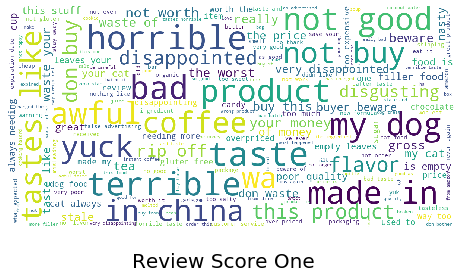

In [40]:
show_wordcloud(cluster1["Summary_Clean"][0], title = "Review Score One")

# Somthing Different - Popularity based Recommendation

In [81]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/Users/sujaikarunakaran/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [82]:
df.shape

(568454, 10)

In [84]:
#Five point summary 

df.describe()['Score'].T

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

In [87]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.Score.min()))
print('Maximum rating is: %d' %(df.Score.max()))

Minimum rating is: 1
Maximum rating is: 5


In [96]:
#Check for missing values
print('Number of missing values across columns: \n',df.isnull().sum())

Number of missing values across columns: 
 Id           0
ProductId    0
UserId       0
Score        0
dtype: int64


Matplotlib is building the font cache using fc-list. This may take a moment.


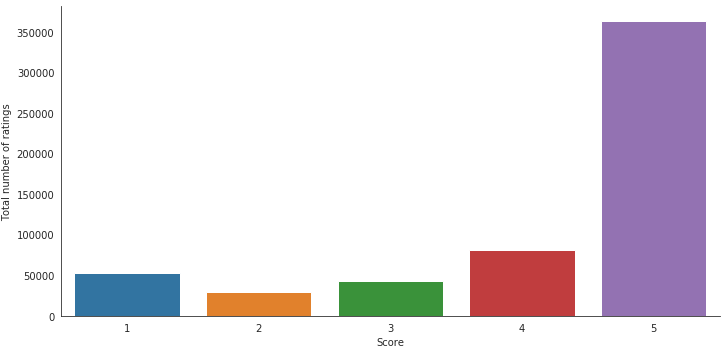

In [89]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Score", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [91]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.UserId)))
print("Total No of products  :", len(np.unique(df.ProductId)))

Total data 
--------------------------------------------------

Total no of ratings : 568454
Total No of Users   : 256059
Total No of products  : 74258


In [95]:
#Dropping the Timestamp column

df.drop(['ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary', 'Text'], axis=1,inplace=True)

KeyError: "['ProfileName' 'HelpfulnessNumerator' 'HelpfulnessDenominator' 'Time'\n 'Summary' 'Text'] not found in axis"

In [97]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = df.groupby(by='UserId')['Score'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
Name: Score, dtype: int64

In [98]:
no_of_rated_products_per_user.describe()

count    256059.000000
mean          2.220012
std           4.443361
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         448.000000
Name: Score, dtype: float64

In [99]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

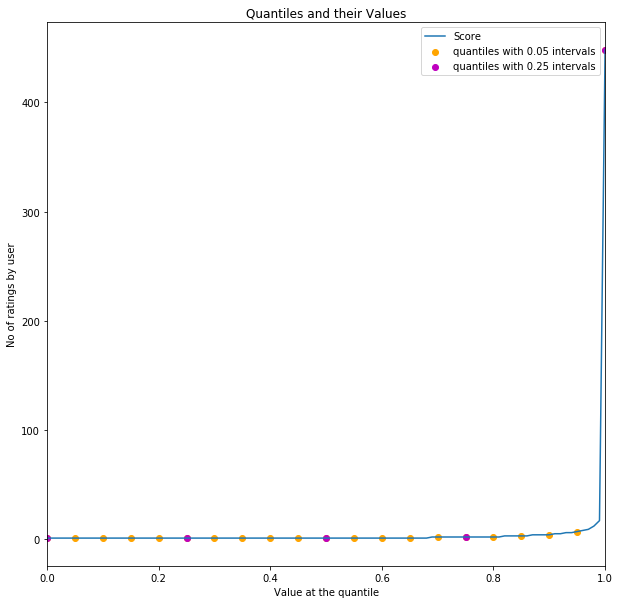

In [100]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [101]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 267



In [104]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=df.groupby("ProductId").filter(lambda x:x['Score'].count() >=50)

Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[]

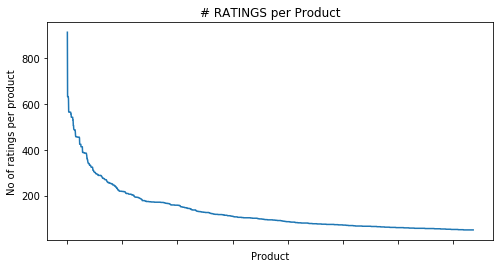

In [105]:
no_of_ratings_per_product = new_df.groupby(by='ProductId')['Score'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [106]:
#Average rating of the product 

new_df.groupby('ProductId')['Score'].mean().head()

ProductId
7310172001    4.751445
7310172101    4.751445
B00004CI84    4.486772
B00004CXX9    4.405128
B00004RAMY    4.104651
Name: Score, dtype: float64

In [107]:
new_df.groupby('ProductId')['Score'].mean().sort_values(ascending=False).head()

ProductId
B000ED9L9E    4.973451
B000O5DI1E    4.906542
B001E6GFKI    4.887500
B000NMJWZO    4.881919
B0044MTGHI    4.880000
Name: Score, dtype: float64

In [108]:
#Total no of rating for product

new_df.groupby('ProductId')['Score'].count().sort_values(ascending=False).head()

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
Name: Score, dtype: int64

In [109]:
ratings_mean_count = pd.DataFrame(new_df.groupby('ProductId')['Score'].mean())

In [110]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('ProductId')['Score'].count())

In [111]:
ratings_mean_count.head()

,Score,rating_counts
ProductId,,
7310172001,4.751445,173
7310172101,4.751445,173
B00004CI84,4.486772,189
B00004CXX9,4.405128,195
B00004RAMY,4.104651,172


<Figure size 576x432 with 0 Axes>

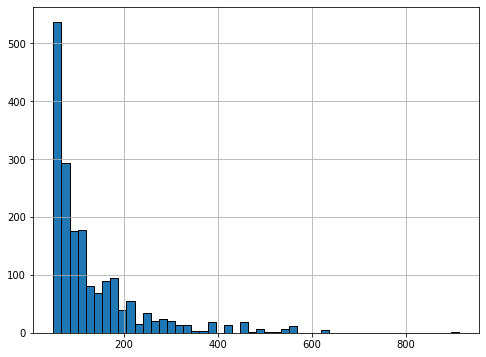

In [112]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

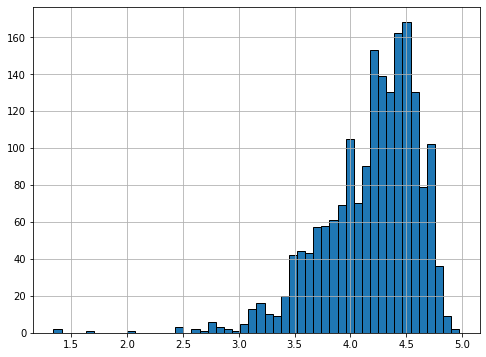

In [114]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Score'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

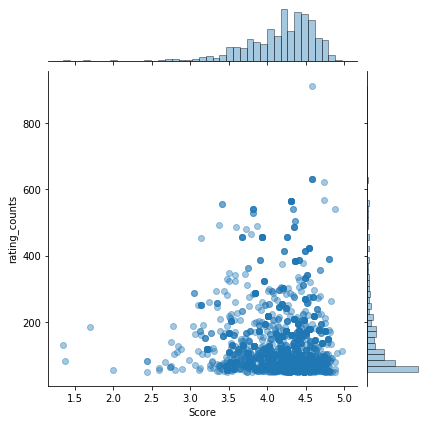

In [116]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Score', y='rating_counts', data=ratings_mean_count, alpha=0.4)

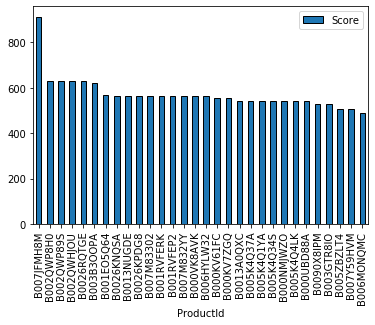

In [117]:
popular_products = pd.DataFrame(new_df.groupby('ProductId')['Score'].count())
most_popular = popular_products.sort_values('Score', ascending=False)
most_popular.head(30).plot(kind = "bar")

# Model-based collaborative filtering system

In [121]:
new_df1=new_df
ratings_matrix = new_df1.pivot_table(values='Score', index='UserId', columns='ProductId', fill_value=0)
ratings_matrix.head()

ProductId,7310172001,7310172101,B00004CI84,B00004CXX9,B00004RAMY,B00004RBDU,B00004RBDZ,B00004RYGX,B00004S1C6,B00005C2M2,...,B0095KATS4,B0096EZHM2,B0098WV8F2,B009AFH6Y4,B009AFJ3I6,B009B87SAC,B009E7YC54,B009GHI5Q4,B009M2LUEW,B009RB4GO4
UserId,,,,,,,,,,,,,,,,,,,,,
#oc-R103C0QSV1DF5E,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0.0
#oc-R109MU5OBBZ59U,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0.0
#oc-R10LFEMQEW6QGZ,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0.0
#oc-R10UA029WVWIUI,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0.0
#oc-R115TNMSPFT9I7,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0.0


In [122]:
X = ratings_matrix.T
X.head()

UserId,#oc-R103C0QSV1DF5E,#oc-R109MU5OBBZ59U,#oc-R10LFEMQEW6QGZ,#oc-R10UA029WVWIUI,#oc-R115TNMSPFT9I7,#oc-R11D9D7SHXIJB9,#oc-R11D9LKDAN5NQJ,#oc-R11DNU2NBKQ23Z,#oc-R11O5J5ZVQE25C,#oc-R11PW3CFBB4BEP,...,AZZMO52V8WZ68,AZZNK89PXD006,AZZRBWCZF6FQE,AZZRFMUO60L7J,AZZSCO5M3BTZ1,AZZTH6DJ0KSIP,AZZU1VEO8KUXH,AZZU5BA2CHYVF,AZZV61COVM8CA,AZZVNIMTTMJH6
ProductId,,,,,,,,,,,,,,,,,,,,,
7310172001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7310172101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004CI84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004CXX9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004RAMY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
X1 = X

In [124]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1844, 10)

In [125]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1844, 1844)

In [130]:
X.index[76]

'B0006Z7NOK'

In [131]:
i = "B0006Z7NOK"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

76

In [133]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1844,)

In [134]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['B00064VQNU',
 'B00064VQO4',
 'B000FFLHU2',
 'B000OQ2DJQ',
 'B000OQ2DL4',
 'B000WV153I',
 'B000WVY4PE',
 'B000WVYB8Y',
 'B00112EUPM',
 'B00125ZCWI',
 'B0018CIPS8',
 'B0019QT66I',
 'B001CGTN1I',
 'B001E0TBA0',
 'B001E18K8S',
 'B001L4JH5I',
 'B002AQL00G',
 'B002LN1ME2',
 'B0038AXN30',
 'B0038B1EOY',
 'B0038B39E2',
 'B003B3OOPA',
 'B003SSWCJI']

# Item Based Collaborative filtering

In [166]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

/bin/sh: apt-get: command not found


In [ ]:
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.sql import Row

# Item based

In [235]:
df = pd.read_csv("/Users/sujaikarunakaran/Downloads/amazon-fine-food-reviews/Reviews copy.csv")

In [236]:
class Recommender:
    def __init__(self, strategy = 'user', neighbours = 10):
        self.strategy = strategy
        self.num_neighbours = neighbours
        if strategy is 'user':
            self.columns = ['User_' + str(index) for index in range(1, self.num_neighbours + 1)]
        elif strategy is 'item':
            self.columns = ['Item_' + str(index) for index in range(1, self.num_neighbours + 1)]
        
    def fit(self, matrix):
        if self.strategy is 'user':
            # User - User based collaborative filtering
            start_time = time.time()
            self.user_item_matrix = matrix
            self.mapper_indices = matrix.index
            self.user_tree = BallTree(matrix, leaf_size = self.num_neighbours * 2)
            time_taken = time.time() - start_time
            print('Model built in {} seconds'.format(time_taken))
            return self
        
        elif self.strategy is 'item':
            # Item - Item based collaborative filtering
            start_time = time.time()
            matrix = matrix.T
            self.item_user_matrix = matrix
            self.mapper_indices = matrix.index
            self.item_tree = BallTree(matrix, leaf_size = self.num_neighbours * 2)
            time_taken = time.time() - start_time
            print('Model built in {} seconds'.format(time_taken))
            return self
            
                    
    def predict(self, X_test):
        if self.strategy is 'user':
            y_pred = pd.Series(index = X_test.index)
            
            for index in tqdm.tqdm(X_test.index, desc = 'Predicting Ratings'):
                row = X_test.loc[index]
                target_user = row['UserId']
                target_product = row['ProductId']
                
                if target_user not in self.user_item_matrix.index:
                    y_pred[index] = 0
                    continue
                
                user_attributes = self.user_item_matrix.loc[target_user]
                _, neighbour_indices = self.user_tree.query(user_attributes.values.reshape(1, -1), k = self.num_neighbours)
                
                rating = 0
                for neighbour_index in neighbour_indices:
                    user = self.mapper_indices[neighbour_index]
                    if target_product in self.user_item_matrix.loc[user].index:
                        rating += self.user_item_matrix.loc[user, target_product]
                    else:
                        rating += 0
                avg_rating = rating/self.num_neighbours
                y_pred.loc[index] = avg_rating
                
            return y_pred.values
        
        elif self.strategy is 'item':
            y_pred = pd.Series(index = X_test.index)
            
            for index in tqdm.tqdm(X_test.index, desc = 'Predicting Ratings'):
                row = X_test.loc[index]
                target_user = row['UserId']
                target_product = row['ProductId']
                
                if target_product not in self.item_user_matrix.index:
                    y_pred[index] = 0
                    continue
                
                item_attributes = self.item_user_matrix.loc[target_product]
                _, neighbour_indices = self.item_tree.query(item_attributes.values.reshape(1, -1), k = self.num_neighbours)
                
                rating = 0
                for neighbour_index in neighbour_indices:
                    product = self.mapper_indices[neighbour_index]
                    if target_user in self.item_user_matrix.loc[product].index:
                        rating += self.item_user_matrix.loc[product, target_user]
                    else:
                        rating += 0
                avg_rating = rating/self.num_neighbours
                y_pred.loc[index] = avg_rating
                
            return y_pred.values
        
    def recommend_items(self, id, num_recommendations = 10):
        if self.strategy is 'user':
            user_id = id
            
            if user_id not in self.user_item_matrix.index:
                # New user - We will be looking at this case later on
                return None
            
            user_attributes = self.user_item_matrix.loc[user_id]
            distances, neighbour_indices = self.user_tree.query(user_attributes.values.reshape(1, -1), k = self.num_neighbours + 1)
            distances = distances[0]
            neighbour_indices = neighbour_indices[0]
            
            # We will be scoring each product by the user's distance from the target user and the 
            # rating given by the user to the item.
            recommendations = pd.DataFrame(columns = ['ProductId', 'Recommendability'])
            
            for index, neighbour_index in enumerate(neighbour_indices):
                user = self.mapper_indices[neighbour_index]
                user_similarity = 1 - distances[index]
                products_with_ratings = self.user_item_matrix.loc[user]
                
                for product_id in products_with_ratings.index:
                    recommendability = user_similarity * products_with_ratings.loc[product_id]
                    recommendation = {'ProductId': product_id, 'Recommendability': recommendability}
                    recommendations = recommendations.append(recommendation, ignore_index = True)
            
            recommendations.sort_values(by = 'Recommendability', ascending = False, inplace = True)
            recommendations = recommendations[~recommendations.duplicated('ProductId')]
            
            max_recommendations = min(num_recommendations, recommendations.shape[0])
            return recommendations.iloc[:max_recommendations, :-1]
        
        elif self.strategy is 'item':
            product_id = id
            
            if product_id not in self.item_user_matrix.index:
                # New product - We will be looking at this case later on
                return None
            
            product_attributes = self.item_user_matrix.loc[product_id]
            distances, neighbour_indices = self.item_tree.query(product_attributes.values.reshape(1, -1), k = num_recommendations)
            distances = distances[0]
            neighbour_indices = neighbour_indices[0]
            
            recommendations = pd.DataFrame(columns = ['ProductId', 'Recommendability'])
            
            for index, neighbour_index in enumerate(neighbour_indices):
                product_id = self.mapper_indices[neighbour_index]
                product_similarity = 1 - distances[index]
                
                recommendation = {'ProductId': product_id, 'Recommendability': product_similarity}
                recommendations = recommendations.append(recommendation, ignore_index = True)
            
            recommendations.sort_values(by = 'Recommendability', ascending = False, inplace = True)
            
            return recommendations.iloc[1:, :-1]

In [237]:
# Let's look at the ratings count of the products
gb_product = df.groupby('ProductId').size()
gb_product = gb_product.sort_values()

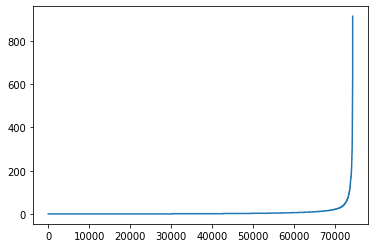

29


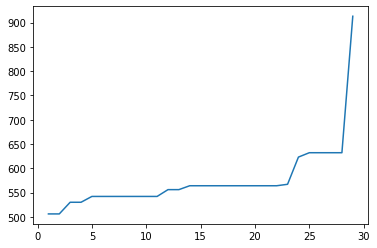

In [238]:
plt.plot(range(1, gb_product.shape[0] + 1), gb_product.values)
plt.show()
high_rated_products = gb_product[gb_product >= 500]
plt.plot(range(1, high_rated_products.shape[0] + 1), high_rated_products.values)
print(high_rated_products.shape[0])

In [239]:
data_complete = df.loc[df['ProductId'].isin(high_rated_products.index)]
data = data_complete.iloc[:, :-1]

In [240]:
user_item_matrix_raw = pd.pivot_table(data_train, index = 'UserId', columns = 'ProductId', values = 'Score', aggfunc = np.sum)

In [241]:
print(user_item_matrix_raw.shape)
user_item_matrix_raw.head(4)

(5724, 29)


ProductId,B000KV61FC,B000KV7ZGQ,B000NMJWZO,B000UBD88A,B000VK8AVK,B0013A0QXC,B0013NUGDE,B001EO5Q64,B001RVFEP2,B001RVFERK,...,B005K4Q34S,B005K4Q37A,B005K4Q4LK,B005ZBZLT4,B006HYLW32,B007JFMH8M,B007M832YY,B007M83302,B007Y59HVM,B0090X8IPM
UserId,,,,,,,,,,,,,,,,,,,,,
#oc-R115TNMSPFT9I7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN
#oc-R11DNU2NBKQ23Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
#oc-R13EBF129DBX88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN
#oc-R1669TSD0WO7EP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
sparsity = np.isnan(user_item_matrix_raw.values).sum()/np.prod(user_item_matrix_raw.shape)
print('The sparsity of the matrix is: {}'.format(sparsity))

The sparsity of the matrix is: 0.920907732716451


In [243]:
# Filling the NaN values with mean of the column
user_item_matrix = user_item_matrix_raw.fillna(user_item_matrix_raw.mean())
user_item_matrix.head(4)

ProductId,B000KV61FC,B000KV7ZGQ,B000NMJWZO,B000UBD88A,B000VK8AVK,B0013A0QXC,B0013NUGDE,B001EO5Q64,B001RVFEP2,B001RVFERK,...,B005K4Q34S,B005K4Q37A,B005K4Q4LK,B005ZBZLT4,B006HYLW32,B007JFMH8M,B007M832YY,B007M83302,B007Y59HVM,B0090X8IPM
UserId,,,,,,,,,,,,,,,,,,,,,
#oc-R115TNMSPFT9I7,3.439825,3.424508,4.866197,4.474178,4.433875,4.542787,4.387892,4.736264,4.402273,4.407925,...,3.945626,3.946387,3.853828,2.0,4.430524,4.565881,4.406742,4.397674,2.000000,3.82069
#oc-R11DNU2NBKQ23Z,3.439825,3.424508,4.866197,4.474178,4.433875,4.542787,4.387892,4.736264,4.402273,4.407925,...,3.945626,3.946387,3.853828,1.0,4.430524,4.565881,4.406742,4.397674,1.000000,3.82069
#oc-R13EBF129DBX88,3.439825,3.424508,4.866197,4.474178,4.433875,4.542787,4.387892,4.736264,4.402273,4.407925,...,3.945626,3.946387,3.853828,2.0,4.430524,4.565881,4.406742,4.397674,2.000000,3.82069
#oc-R1669TSD0WO7EP,3.439825,3.424508,4.866197,4.474178,4.433875,4.542787,4.387892,4.736264,4.402273,4.407925,...,3.945626,3.946387,3.853828,1.0,4.430524,4.565881,4.406742,4.397674,4.358354,3.82069


In [244]:
user_item_matrix_rating = user_item_matrix.apply(lambda row: row - 3)

In [245]:
recommender = Recommender().fit(user_item_matrix)

Model built in 0.08089900016784668 seconds


In [246]:
recommender_rating = Recommender().fit(user_item_matrix_rating)

Model built in 0.08712196350097656 seconds


In [247]:
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

In [248]:
from sklearn.metrics import mean_squared_error

In [249]:
# Predicting using the two recommender models for normal as well as overhead rating 
y_pred = recommender.predict(X_test)
y_pred_rating = recommender_rating.predict(X_test)

y_pred_rating += 3

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rating = np.sqrt(mean_squared_error(y_test, y_pred_rating))

print('RMSE using first perscpective: {}\nRMSE using second perspective: {}'.format(rmse, rmse_rating))


Predicting Ratings: 100%|██████████| 3337/3337 [00:08<00:00, 388.50it/s]

Predicting Ratings: 100%|██████████| 3337/3337 [00:07<00:00, 457.14it/s]


ValueError: could not convert string to float: "Can't eat just one!"

In [198]:
recommender_item = Recommender(strategy = 'item').fit(user_item_matrix)

Model built in 0.002318143844604492 seconds


In [190]:
recommender_item_rating = Recommender(strategy = 'item').fit(user_item_matrix_rating)

Model built in 0.0014309883117675781 seconds


In [191]:
# Predicting using the two recommender models for normal as well as overhead rating 
y_item_pred = recommender_item.predict(X_test)
y_item_pred_rating = recommender_item_rating.predict(X_test)

y_item_pred_rating += 3

rmse = np.sqrt(mean_squared_error(y_test, y_item_pred))
rmse_rating = np.sqrt(mean_squared_error(y_test, y_item_pred_rating))

print('RMSE using first perscpective: {}\nRMSE using second perspective: {}'.format(rmse, rmse_rating))

TypeError: 'module' object is not callable